In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
data = pd.read_excel('/content/factbook-_1.xls')

In [71]:
# Menghapus spasi di awal dan akhir nama kolom
data.columns = data.columns.str.strip()
print("Nama kolom dalam dataset:")
print(data.columns)

Nama kolom dalam dataset:
Index(['Country', 'Area', 'Birth rate', 'Current account balance',
       'Death rate', 'Electricity consumption', 'Electricity production',
       'Exports', 'GDP', 'GDP per capita', 'GDP real growth rate', 'Highways',
       'Imports', 'Industrial production growth rate', 'Infant mortality rate',
       'Inflation rate', 'Internet users', 'Investment', 'Labor force',
       'Life expectancy at birth', 'Military expenditures',
       'Natural gas consumption', 'Oil consumption', 'Population',
       'Public debt', 'Railways', 'Reserves of foreign exchange & gold',
       'Total fertility rate', 'Unemployment rate'],
      dtype='object')


In [72]:
# Select relevant columns
columns_to_keep = ['Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate', 'GDP']
data = data[columns_to_keep]

In [73]:
data.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate,GDP
0,"$538,800,000,000.00","$401,800,000,000.00",6.6,24,4.7,"$3,745,000,000,000.00"
1,"$893,300,000,000.00","$716,700,000,000.00",2.2,17.6,10.6,"$2,362,000,000,000.00"
2,"$113,000,000,000.00","$36,210,000,000.00",2.8,17.2,25,"$310,200,000,000.00"
3,"$162,500,000,000.00","$92,910,000,000.00",6.4,19.1,8.3,"$1,408,000,000,000.00"
4,"$130,700,000,000.00","$121,100,000,000.00",4.7,20.4,3.4,"$251,900,000,000.00"


In [74]:
# Remove whitespace from string columns
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [75]:
# Replace empty strings with NaN and drop rows with NaN
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)

In [76]:
# Convert data to numeric (removing commas and converting to float)
for col in columns_to_keep:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

In [77]:
data.head()

,Exports,Imports,Industrial production growth rate,Investment,Unemployment rate,GDP
0,5.388000e+11,4.018000e+11,6.6,24.0,4.7,3.745000e+12
1,8.933000e+11,7.167000e+11,2.2,17.6,10.6,2.362000e+12
2,1.130000e+11,3.621000e+10,2.8,17.2,25.0,3.102000e+11
3,1.625000e+11,9.291000e+10,6.4,19.1,8.3,1.408000e+12
4,1.307000e+11,1.211000e+11,4.7,20.4,3.4,2.519000e+11


In [78]:
# Split data into features and target
X = data.drop(columns=['GDP'])
y = data['GDP']

In [79]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [80]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_tot = np.sum((y_true - mean_y) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

In [81]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [82]:
# Training model
model = LinearRegression()
model.fit(X_train, y_train)

In [83]:
# Predictions
y_pred = model.predict(X_test)

In [84]:
# Evaluasi model
mse = model.mean_squared_error(y_test, y_pred)
r2 = model.r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.8024226743455297e+23
R-squared: 0.5485562285598404


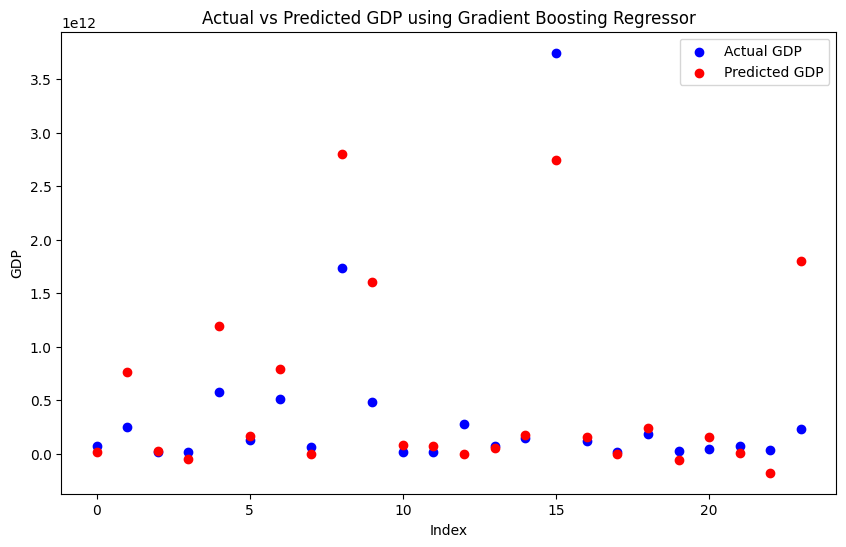

In [85]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual GDP')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted GDP')
plt.xlabel('Index')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP using Gradient Boosting Regressor')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params_gbr = grid_GBR.best_params_
print("Best Hyperparameters for Random Forest:", best_params_gbr)

# Melatih model dengan hyperparameter terbaik
best_gbr = GradientBoostingRegressor(**best_params_gbr)
best_gbr.fit(X_train, y_train)

y_pred_gbr = best_gbr.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse_gbr}")
print(f"R-squared: {r2_gbr}")

In [ ]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual GDP')
plt.scatter(range(len(y_pred_gbr)), y_pred_gbr, color='red', label='Predicted GDP')
plt.xlabel('Index')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP using Gradient Boosting Regressor')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Define Random Forest Regressor
rf_regressor = RandomForestRegressor()
# Define hyperparameters for Grid Search
parameters = {'n_estimators': [100, 500, 1000],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=parameters, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Melatih model dengan hyperparameter terbaik
best_rf = RandomForestRegressor(**best_params_rf)
best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

In [ ]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual GDP')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', label='Predicted GDP')
plt.xlabel('Index')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP using Gradient Boosting Regressor')
plt.legend()
plt.show()

In [ ]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X):
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            clusters = self._create_clusters(X)
            centroids_old = self.centroids
            self.centroids = self._get_centroids(clusters, X)
            if self._is_converged(centroids_old, self.centroids):
                break

    def predict(self, X):
        clusters = self._create_clusters(X)
        return self._get_cluster_labels(clusters, X)

    def _create_clusters(self, X):
        clusters = [[] for _ in range(self.n_clusters)]
        for idx, sample in enumerate(X):
            centroid_idx = self._closest_centroid(sample)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample):
        distances = [np.linalg.norm(sample - point) for point in self.centroids]
        return np.argmin(distances)

    def _get_centroids(self, clusters, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _get_cluster_labels(self, clusters, X):
        labels = np.empty(X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _is_converged(self, centroids_old, centroids):
        distances = [np.linalg.norm(centroids_old[i] - centroids[i]) for i in range(self.n_clusters)]
        return sum(distances) == 0

In [ ]:
# Metode Elbow untuk menentukan jumlah kluster optimal
def plot_elbow_method(X, max_clusters=10):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, max_iter=100)
        kmeans.fit(X)
        centroids = kmeans.centroids
        clusters = kmeans._create_clusters(X)
        current_sse = 0
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                current_sse += np.linalg.norm(X[sample_idx] - centroids[cluster_idx]) ** 2
        sse.append(current_sse)
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method')
    plt.show()

    # Plot Elbow Method untuk menentukan jumlah kluster optimal
plot_elbow_method(X_normalized, max_clusters=10)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def calculate_silhouette_scores(X, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        clustering = AgglomerativeClustering(n_clusters=n_clusters)
        y_clusters = clustering.fit_predict(X)
        score = silhouette_score(X, y_clusters)
        silhouette_scores.append(score)
    return silhouette_scores

In [ ]:
# Plot Silhouette Scores untuk menentukan jumlah kluster optimal
silhouette_scores = calculate_silhouette_scores(X_normalized, max_clusters=10)
optimal_clusters = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

In [ ]:
# Fit model Agglomerative Clustering dengan jumlah kluster yang optimal
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
y_clusters_agg = agg_clustering.fit_predict(X_normalized)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [ ]:
# Train Agglomerative Clustering dengan jumlah kluster optimal
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
y_clusters = agg_clustering.fit_predict(X_normalized)

In [ ]:
# Evaluasi kualitas clustering menggunakan Silhouette Score
silhouette_avg = silhouette_score(X_normalized, y_clusters)
print(f"Silhouette Score for optimal clustering: {silhouette_avg}")

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Agglomerative Clustering Results with {optimal_clusters} Clusters')
plt.colorbar()
plt.show()